In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

%env CUDA_VISIBLE_DEVICES=6

# Global imports
import IPython
from PIL import Image, ImageOps, ImageFont, ImageDraw
import matplotlib.pyplot as plt

# Local imports
from params import parse_params
from pipeline import TestPipeline

# A hack to import a local library
sys.path.append("../pilutils/lib/src")
import functions as pilutils

sys.argv=['']; del sys

env: CUDA_VISIBLE_DEVICES=6


In [2]:
params = parse_params('../params.yaml', './params/baseline_retrieve.yaml')
fold_index = 0
param_val = 0.5
epoch_num = 1
test_pipeline = TestPipeline(params, 'train', fold_index, param_name=params.experiment.sat_param, param_val=param_val,
    feat_mean=None, feat_std=None)
feat_dict, path_dict = test_pipeline.viz_test(epoch_num)

Viz...


../pipeline.py:1206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.add.at(conf_arr, [label_var.cpu().numpy(), pred_tsr.cpu().numpy()], 1)
100% (394 of 394) |######################| Elapsed Time: 0:08:43 Time:  0:08:43


val loss: 1.638
val acc: 0.000


In [111]:
min_gallery = 0
top_n = 5
num_probes = 3
cls_list = [3, 4, 1]
probe_img_list, gallery_img_list, match_idx_list, dist_list = test_pipeline.viz_prep2(feat_dict, path_dict, cls_list,
    min_gallery=min_gallery, top_n=top_n, num_probes=num_probes)

dict_keys([3, 29, 30, 28, 25, 12, 4, 21, 22, 23, 13, 27, 18, 31, 16, 32, 1, 34, 26, 7, 9, 33, 24, 5, 10, 0, 6, 14, 8, 19, 15, 20, 2, 17, 11])
[<transform.CenterCrop object at 0x7fa5a18c4048>, <transform.Satellite object at 0x7fa5a18c4dd8>, <transform.DeTuple object at 0x7fa5a18c4a20>, <function TestPipeline.viz_prep2.<locals>.<lambda> at 0x7fa590847400>, <function TestPipeline.viz_prep2.<locals>.<lambda> at 0x7fa590cf57b8>, <function TestPipeline.viz_prep2.<locals>.<lambda> at 0x7fa57aafa158>, <function TestPipeline.viz_prep2.<locals>.<lambda> at 0x7fa57aafa950>, ToPILImage(), Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)]


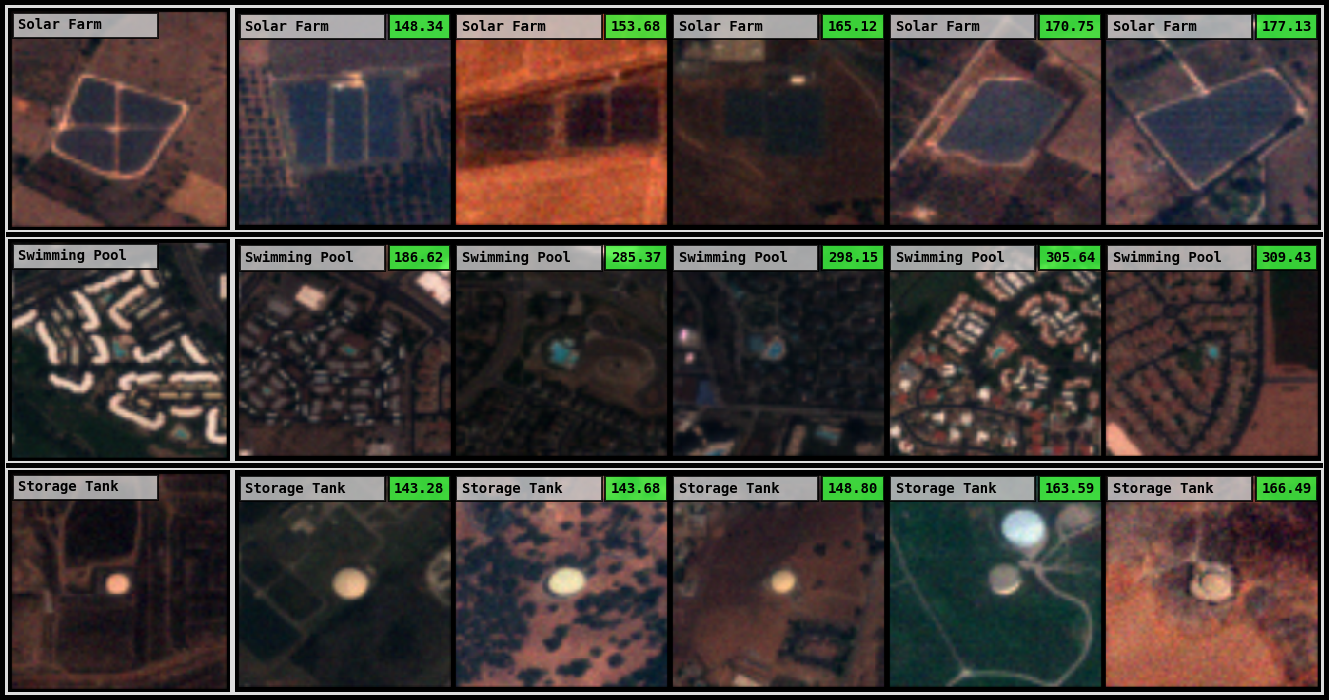

In [114]:
row_list = []
for i in range(num_probes):
    gallery_img_list_i, gallery_label_list = zip(*gallery_img_list[i])
    probe_img, probe_label = probe_img_list[i]
    probe_label = '{:<16}'.format(probe_label.replace('_', ' ').title())
    gallery_label_list = ['{:<16}'.format(l.replace('_', ' ').title()) for l in gallery_label_list]
    gallery_dist_list = ['{:>5.2f}'.format(d) for d in dist_list[i]]
    label_list2 = [gallery_label_list, gallery_dist_list]
    color_list2 = list(zip(*[['0.8', (0.25, 1.0, 0.25)] if match else ['0.8', (1.0, 0.25, 0.25)] for match in match_idx_list[i]]))
    gallery_img = pilutils.lmosaic2(gallery_img_list_i, label_list2, color_list2, len(gallery_img_list_i), 1,
                                spacing=0.02, border=3, fontsize=14, fontfamily='monospace',
                                box_padding=0.4,
                                box_offset=7, box_type='square', box_alpha=0.8)
    probe_img = pilutils.lmosaic([probe_img], [probe_label], 1, 1,
                                spacing=0.02, border=3, fontsize=14, fontfamily='monospace',
                                box_padding=0.4,
                                box_offset=7, box_type='square', box_alpha=0.8)

    row_img = pilutils.hstitch([probe_img, gallery_img], border=2, spacing=5, spacing_color=pilutils.GRAY, border_color=pilutils.GRAY)
    row_list.append(row_img)

mosaic = pilutils.vstitch(row_list, spacing=5, border=1, spacing_color=pilutils.BLACK, border_color=pilutils.GRAY)
mosaic = ImageOps.expand(mosaic, border=5, fill=pilutils.BLACK)
IPython.display.display(mosaic)
